In [3]:
#Import packages
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

## Read in Data

In [4]:
df = pd.read_csv('kc_house_data_train.csv')

## Exploratory Data Analysis 
    
See other notebook for additional EDA visualizations and statistical tests.

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [7]:
#Checking heatmap to see if there is any correlation between variables and price
corr=df.corr()

<AxesSubplot:>

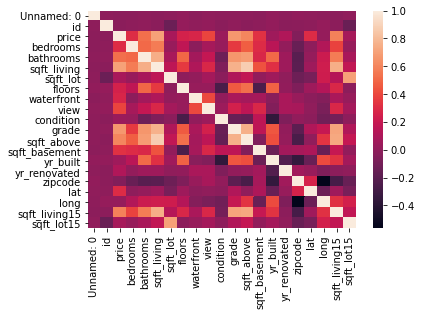

In [8]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

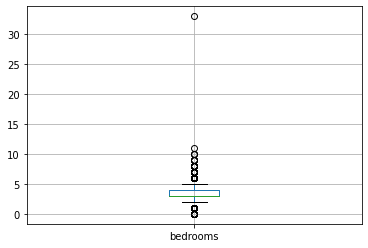

In [9]:
#Checking bedrooms column for extreme values to clean up in next step
df.boxplot('bedrooms')

## Clean up data

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [10]:
#Updating case where there is 33 rooms to 3
df['bedrooms'] = np.where(df['bedrooms']==33, 3, df['bedrooms'])

<AxesSubplot:>

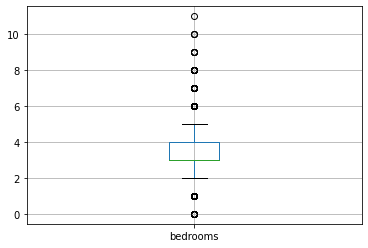

In [11]:
#Checking bedrooms column again
df.boxplot('bedrooms')

In [12]:
#Checking if columns have any zero values
df[df['bedrooms']==0]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,483,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,1120,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,2430,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,3032,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,3609,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,5424,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,6409,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,9286,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,10067,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,10074,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [13]:
#Replacing zero bedrooms based on number of floors 
avg_bed = df['bedrooms'].mean()/df['floors'].mean()
df['bedrooms'] = np.where(df['bedrooms']==0, df['floors']*avg_bed, df['bedrooms'])

In [14]:
#Checking bedroom column again
df[df['bedrooms']==0]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [15]:
#Checking if columns have any zero values
df[df['bathrooms']==0]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,483,3374500520,20150429T000000,355000.0,4.523528,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,1120,6306400140,20140612T000000,1095000.0,7.916173,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3032,3032,7849202190,20141223T000000,235000.0,4.523528,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
5424,5424,3918400017,20150205T000000,380000.0,6.785292,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
9060,9060,3421079032,20150217T000000,75000.0,1.000000,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
9286,9286,2954400190,20140624T000000,1295650.0,4.523528,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,10067,3980300371,20140926T000000,142000.0,2.261764,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
12982,12982,203100435,20140918T000000,484000.0,1.000000,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [16]:
#Replacing zero bathrooms based on number of floors 
avg_bath = df['bathrooms'].mean()/df['floors'].mean()
df['bathrooms'] = np.where(df['bathrooms']==0, df['floors']*avg_bed, df['bathrooms'])

In [17]:
#Checking bathrooms column again
df[df['bathrooms']==0]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Generate new features for predicting price.


In [18]:
#Created a dummy variable for zipcode
zip_df = df['zipcode']
dummy_df = pd.get_dummies(zip_df, prefix='var_', drop_first=True)

In [19]:
#Creating a new list for year sold
years = []
for date in df['date']:
    years.append(date[0:4])
df['year_sold']=years

In [20]:
#Creating a new variable for age of building since sale
df['year_sold'] = pd.to_numeric(df['year_sold'])

In [21]:
df['age'] = df['year_sold']-df['yr_built']

In [22]:
#Create column for most recent time work was done (if not renovated, this is the year built)
df['most_recent']=np.where(df['yr_renovated']==0, df['yr_built'], df['yr_renovated'])

In [23]:
#Engineering a new feature for whether or not the house was renovated
df['renovated'] = np.where(df['yr_renovated']==0,0,1)

In [24]:
#Engineering a new feature for whether or not the house is north or east of the Space Needle
space_lat = 47.6
space_long = -122.3
df['n']=np.where(df['lat']>space_lat, 1, 0)
df['e']=np.where(df['long']>space_long, 1, 0)

In [41]:
#Engineering a new feature for abs value of difference in lat from space needle

In [40]:
df['lat_from'] = abs(df['lat']-space_lat)

In [42]:
#Engineering a new feature for abs value of difference in long from space needle

In [43]:
df['long_from'] = abs(df['long']-space_long)

### <ins>Non-linear transformations</ins>

### Polynomial features

In [45]:
df['sqft_living^2'] = df['sqft_living']*df['sqft_living']
df['sqft_lot^2'] = df['sqft_lot']*df['sqft_lot']
df['sqft_living15^2'] = df['sqft_living15']*df['sqft_living15']
df['sqft_lot15^2'] = df['sqft_lot15']*df['sqft_lot15']
df['lat_from^2'] = df['lat_from']*df['lat_from']
df['long_from^2'] = df['long_from']*df['long_from']

### Interaction features


In [46]:
df['sqft_living-n'] = df['sqft_living']*df['n']
df['sqft_lot-n'] = df['sqft_lot']*df['n']
df['sqft_living15-n'] = df['sqft_living15']*df['n']
df['sqft_lot15-n'] = df['sqft_lot15']*df['n']
df['sqft_living-e'] = df['sqft_living']*df['e']
df['sqft_lot-e'] = df['sqft_lot']*df['e']
df['sqft_living15-e'] = df['sqft_living15']*df['e']
df['sqft_lot15-e'] = df['sqft_lot15']*df['e']

### Concatenate dummy df

In [48]:
full_df = pd.concat([df, dummy_df], axis = 1)

In [49]:
full_df.shape

(17290, 113)

### Model Evaluation




### Perform a train-test split of the data.

In [50]:
df_features = full_df.drop(['Unnamed: 0', 'id', 'date', 'price', 'zipcode'], axis=1)

In [51]:
target = full_df['price']

In [52]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

### Fit the model to the training data.

In [54]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 148897.90520048107


### Evaluate on the test set

In [55]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 142411.11176360582
Training:  148897 vs. Testing:  142411


### Refit to entire dataset

In [69]:
selected = list(X_test.columns)

In [70]:

lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(full_df[selected], full_df['price'])

In [72]:
y_pred = lm.predict(full_df[selected])

In [73]:
residuals = full_df['price']-y_pred

<AxesSubplot:>

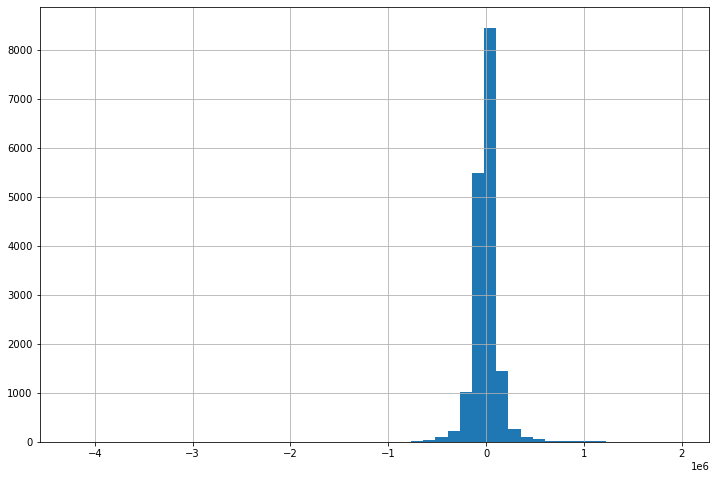

In [84]:
#Create a histogram plot of the errors to see if it is normally distributed
residuals.hist(bins=50, figsize = (12,8))

<AxesSubplot:xlabel='price'>

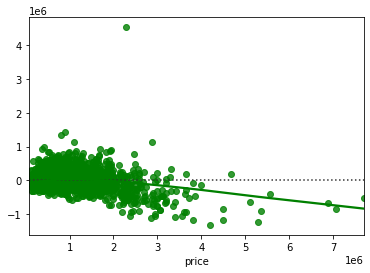

In [85]:
#Check to see if our errors are Independent and identically distributed (IID) and homoscedastic.
sns.residplot(full_df['price'], y_pred, lowess=True, color="g")

In [92]:
#save final output
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [93]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(selected, pickle_out)
pickle_out.close()